<a href="https://colab.research.google.com/github/ekolonsky/methane_soil_thesis_AEK/blob/main/Methane_Flux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ экспериментальных данных
##  Датасет замеров эмиссии и поголощения метана почвой 

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ekolonsky/methane_soil_thesis_AEK/main/Dataset_methane_soil_flux.csv'
df = pd.read_csv(url, delimiter=';', decimal=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             48 non-null     int64  
 1   Site              48 non-null     object 
 2   Point             48 non-null     object 
 3   LatitudeDegree    48 non-null     int64  
 4   Latitude Minute   48 non-null     float64
 5   LongitudeDegree   48 non-null     int64  
 6   Longitude Minute  48 non-null     float64
 7   Day               48 non-null     int64  
 8   Month             48 non-null     int64  
 9   Year              48 non-null     int64  
 10  Time              48 non-null     object 
 11  Flux              48 non-null     float64
 12  Error             48 non-null     float64
 13  AirT              48 non-null     float64
 14  SoilT1            22 non-null     float64
 15  DepthT1           48 non-null     int64  
 16  SoilT2            48 non-null     float64
 17 

In [ ]:
data = df

In [ ]:
data['Water'] = data['WTL'].apply(lambda x: x if x>0 else 60)
data['Water'] = data.Water.astype('category')
data['Emission'] = data.apply(lambda row: row.Flux if abs(row.Flux) > row.Error else 0,  axis=1)
data['AbsEmission'] = data['Emission'].apply(np.abs)
data['SignEmission'] = data['Emission'].apply(np.sign)


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


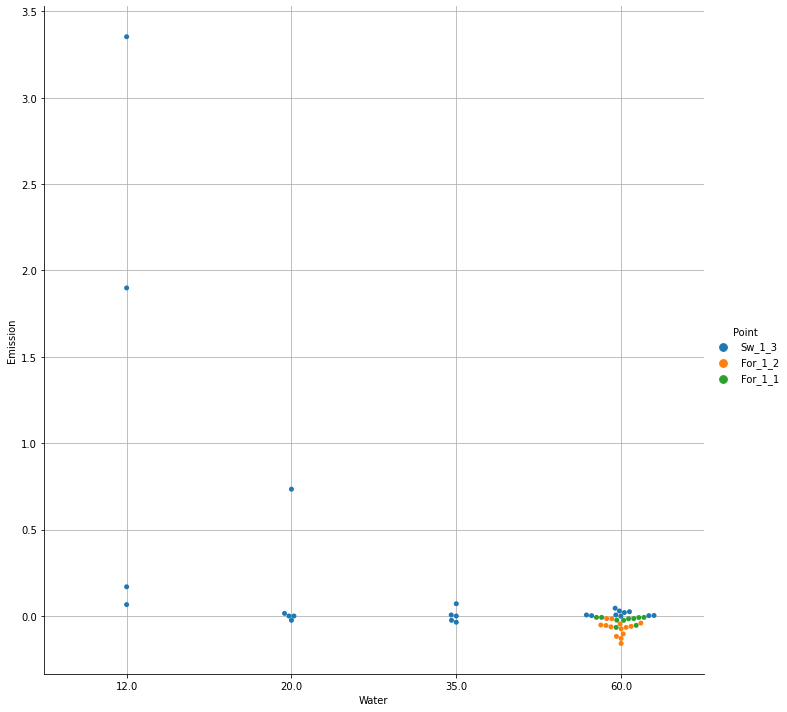

In [ ]:
g = sns.catplot(data=data, x='Water', y='Emission', hue='Point', height=10, s=5, kind='swarm')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


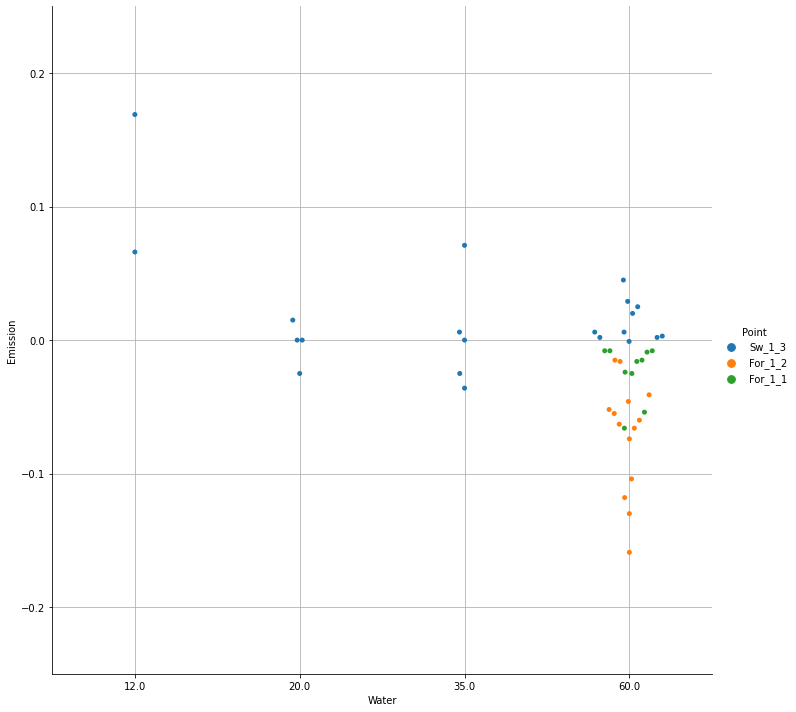

In [ ]:
g = sns.catplot(data=data, x='Water', y='Emission', hue='Point', height=10, s=5, kind='swarm')
g.set(ylim=(-0.25,0.25))
plt.grid()
plt.show()

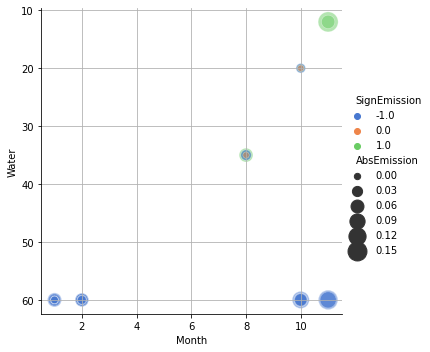

In [ ]:
g = sns.relplot(data=data[data.AbsEmission<0.25], x='Month', y='Water', 
                size = 'AbsEmission', hue='SignEmission', 
                sizes=(40, 400), alpha=.5, palette="muted")
plt.grid()
plt.show()

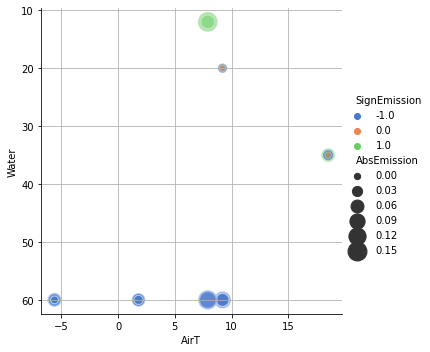

In [ ]:
g = sns.relplot(data=data[data.AbsEmission<0.25], x='AirT', y='Water', 
                size = 'AbsEmission', hue='SignEmission', 
                sizes=(40, 400), alpha=.5, palette="muted")
plt.grid()
plt.show()

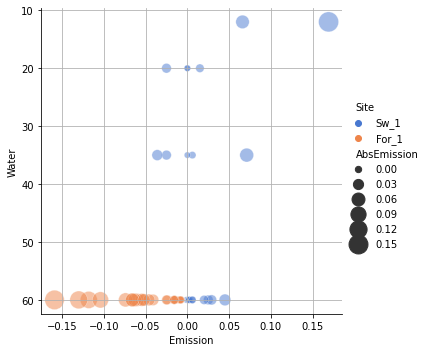

In [168]:
g = sns.relplot(data=data[data.AbsEmission<0.25], x='Emission', y='Water', 
#g = sns.relplot(data=data, x='Water', y='Emission', 
                size = 'AbsEmission', hue= 'Site', 
                sizes=(40, 400), alpha=.5, palette="muted")
plt.grid()
plt.show()